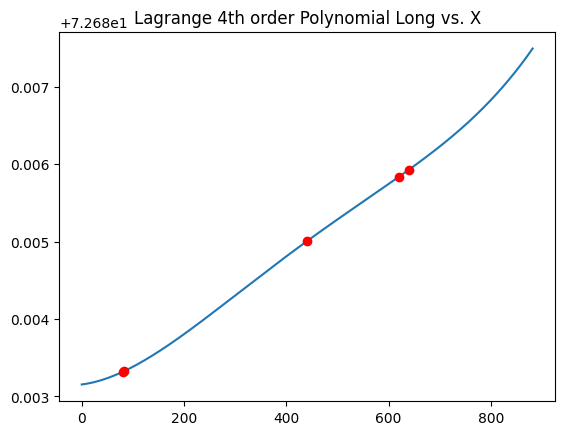

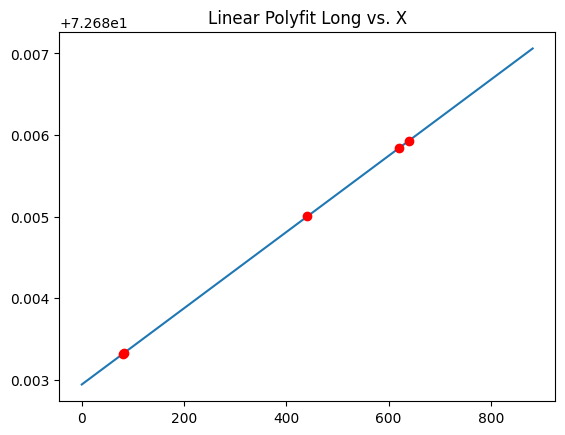

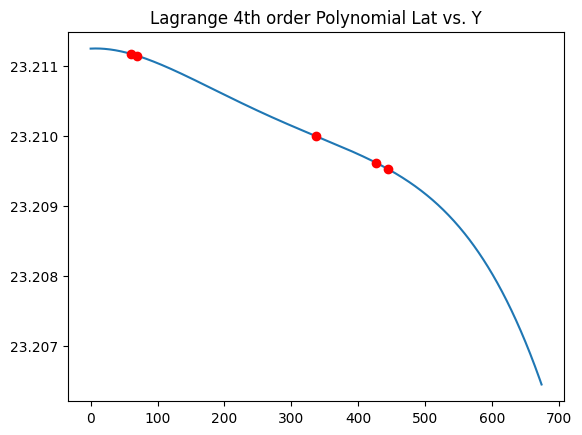

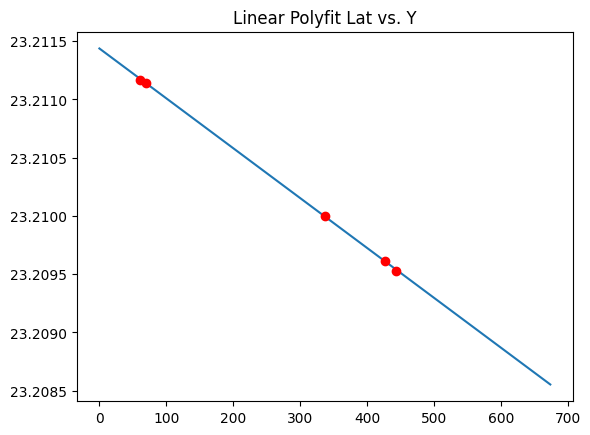

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

(L1, Lo1) = (23.211144, 72.6833273)
(L2, Lo2) = (23.211170, 72.685835)
(L3, Lo3) = (23.209616, 72.685929)
(L4, Lo4) = (23.209530, 72.683318)
(L5, Lo5) = (23.209997, 72.685008)

(X1, Y1) = (83, 70)
(X2, Y2) = (620, 61)
(X3, Y3) = (640, 427)
(X4, Y4) = (80, 444)
(X5, Y5) = (441, 337)

## Quintic Lagrangian Interpolation
def LX(X):
  w_X = ((X - X2) * (X - X3) * (X - X4) * (X - X5)) / ((X1 - X2) * (X1 - X3) * (X1 - X4) * (X1 - X5))
  w_X1 = ((X - X1) * (X - X3) * (X - X4) * (X - X5)) / ((X2 - X1) * (X2 - X3) * (X2 - X4) * (X2 - X5))
  w_X2 = ((X - X1) * (X - X2) * (X - X4) * (X - X5)) / ((X3 - X1) * (X3 - X2) * (X3 - X4) * (X3 - X5))
  w_X3 = ((X - X1) * (X - X2) * (X - X3) * (X - X5)) / ((X4 - X1) * (X4 - X2) * (X4 - X3) * (X4 - X5))
  w_X4 = ((X - X1) * (X - X2) * (X - X3) * (X - X4)) / ((X5 - X1) * (X5 - X2) * (X5 - X3) * (X5 - X4))
  return (w_X*Lo1) + (w_X1*Lo2) + (w_X2*Lo3) + (w_X3*Lo4) + (w_X4*Lo5)

def LY(Y):
  w_Y = ((Y - Y2) * (Y - Y3) * (Y - Y4) * (Y - Y5)) / ((Y1 - Y2) * (Y1 - Y3) * (Y1 - Y4) * (Y1 - Y5))
  w_Y1 = ((Y - Y1) * (Y - Y3) * (Y - Y4) * (Y - Y5)) / ((Y2 - Y1) * (Y2 - Y3) * (Y2 - Y4) * (Y2 - Y5))
  w_Y2 = ((Y - Y1) * (Y - Y2) * (Y - Y4) * (Y - Y5)) / ((Y3 - Y1) * (Y3 - Y2) * (Y3 - Y4) * (Y3 - Y5))
  w_Y3 = ((Y - Y1) * (Y - Y2) * (Y - Y3) * (Y - Y5)) / ((Y4 - Y1) * (Y4 - Y2) * (Y4 - Y3) * (Y4 - Y5))
  w_Y4 = ((Y - Y1) * (Y - Y2) * (Y - Y3) * (Y - Y4)) / ((Y5 - Y1) * (Y5 - Y2) * (Y5 - Y3) * (Y5 - Y4))
  return (w_Y*L1) + (w_Y1*L2) + (w_Y2*L3) + (w_Y3*L4) + (w_Y4*L5)


x, y = np.arange(0, 883, 1), np.arange(0, 675, 1)
xL, yL = LX(x), LY(y)
# xL will contain Longitude Values as X pixels decide the Longitude
# yL will contain Latitude Values as Y pixels decide the Latitude

X = np.array([83, 620, 640, 80, 441])
Lx = np.array([23.211144, 23.211170, 23.209616, 23.209530, 23.209997])

Y = np.array([70, 61, 427, 444, 337])
Ly = np.array([72.6833273, 72.685835, 72.685929, 72.683318, 72.685008])

mx, cx = np.polyfit(X, Ly, 1)
my, cy = np.polyfit(Y, Lx, 1)

plt.plot(x, xL)
plt.plot(X, Ly, "o", color = "red")
plt.title("Lagrange 4th order Polynomial Long vs. X")
plt.show()
plt.plot(x, mx*x + cx)
plt.plot(X, Ly, "o", color = "red")
plt.title("Linear Polyfit Long vs. X")
plt.show()
plt.plot(y, yL)
plt.plot(Y, Lx, "o", color = "red")
plt.title("Lagrange 4th order Polynomial Lat vs. Y")
plt.show()
plt.plot(y, my*y + cy)
plt.plot(Y, Lx, "o", color = "red")
plt.title("Linear Polyfit Lat vs. Y")
plt.show()
# print(yL-23.211366)

def get_XY(L, Lo):
  return (round((Lo - cx)/mx), round((L - cy)/my))

def get_XY_Alt(L, Lo):
  Xi, Yi = find_nearest(xL, Lo), find_nearest(yL, L)
  return Xi, Yi


def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx


In [ ]:
get_XY(23.210156, 72.684942)

(428, 299)

In [ ]:
get_XY_Alt(23.210156, 72.684942)

(427, 298)

In [ ]:
import cv2

In [ ]:

location = (23.210216, 72.684828)
coordinates = get_XY_Alt(location[0], location[1])
img = cv2.imread("TL.png", -1)
img_new = cv2.circle(img, coordinates, 7, (226, 233, 0), 3)
img_final = cv2.putText(img_new, f"{location}", (coordinates[0] + 10, coordinates[1] + 10), cv2.FONT_HERSHEY_COMPLEX, 0.75, (0, 255, 255), 2, cv2.LINE_AA)

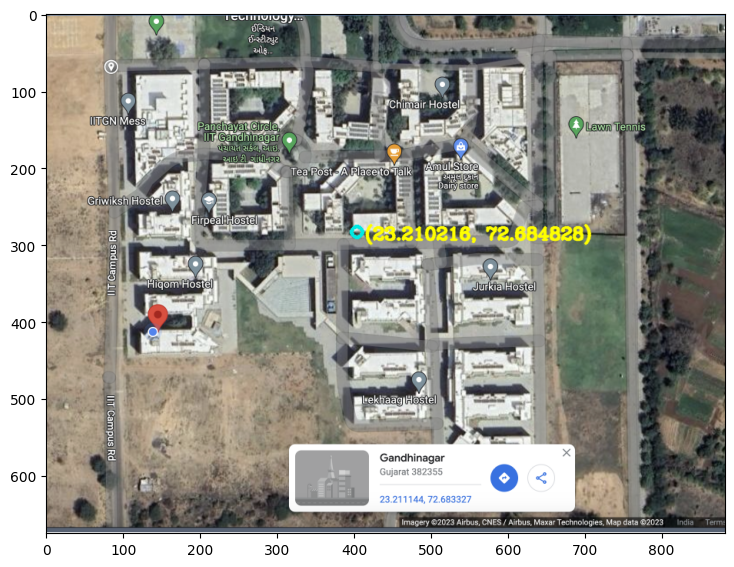

In [ ]:
plt.figure(figsize = (8.82, 6.74))
plt.imshow(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img = cv2.imread("TL.png", -1)
img_flip = np.flip(img, axis = 1)

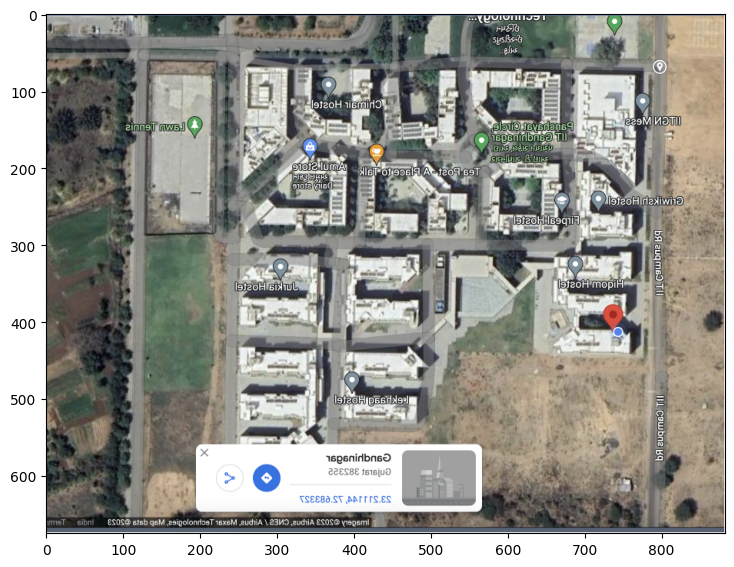

In [ ]:
plt.figure(figsize = (8.82, 6.74))
plt.imshow(cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB))
plt.show()

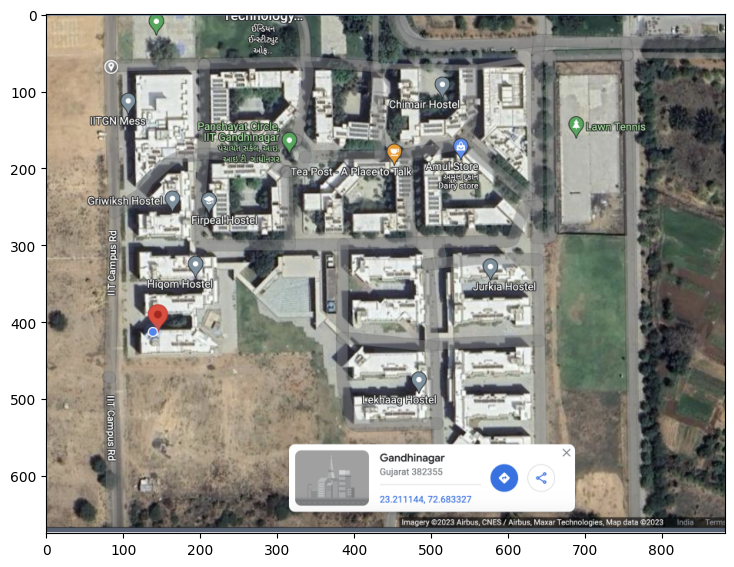

In [ ]:
plt.figure(figsize = (8.82, 6.74))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img

array([[[255, 255, 255,   0],
        [149,  82,  40, 255],
        [149,  82,  40, 255],
        ...,
        [149,  82,  40, 255],
        [149,  82,  40, 255],
        [149,  82,  40, 255]],

       [[255, 255, 255,   0],
        [173, 121,  84, 255],
        [173, 121,  84, 255],
        ...,
        [173, 121,  84, 255],
        [173, 121,  84, 255],
        [173, 121,  84, 255]],

       [[255, 255, 255,   0],
        [127, 157, 176, 255],
        [127, 160, 179, 255],
        ...,
        [189, 194, 189, 255],
        [193, 197, 192, 255],
        [196, 199, 192, 255]],

       ...,

       [[255, 255, 255,   0],
        [113,  96,  86, 255],
        [113,  96,  86, 255],
        ...,
        [114,  97,  86, 255],
        [114,  97,  86, 255],
        [114,  97,  86, 255]],

       [[255, 255, 255,   0],
        [113,  96,  86, 255],
        [113,  96,  86, 255],
        ...,
        [114,  97,  86, 255],
        [114,  97,  86, 255],
        [114,  97,  86, 255]],

       [[255

In [ ]:
.img_flip

array([[[149,  82,  40, 255],
        [149,  82,  40, 255],
        [149,  82,  40, 255],
        ...,
        [149,  82,  40, 255],
        [149,  82,  40, 255],
        [255, 255, 255,   0]],

       [[173, 121,  84, 255],
        [173, 121,  84, 255],
        [173, 121,  84, 255],
        ...,
        [173, 121,  84, 255],
        [173, 121,  84, 255],
        [255, 255, 255,   0]],

       [[196, 199, 192, 255],
        [193, 197, 192, 255],
        [189, 194, 189, 255],
        ...,
        [127, 160, 179, 255],
        [127, 157, 176, 255],
        [255, 255, 255,   0]],

       ...,

       [[114,  97,  86, 255],
        [114,  97,  86, 255],
        [114,  97,  86, 255],
        ...,
        [113,  96,  86, 255],
        [113,  96,  86, 255],
        [255, 255, 255,   0]],

       [[114,  97,  86, 255],
        [114,  97,  86, 255],
        [114,  97,  86, 255],
        ...,
        [113,  96,  86, 255],
        [113,  96,  86, 255],
        [255, 255, 255,   0]],

       [[255